In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data
creditCard_data=pd.read_csv('/content/creditcard.csv')

In [3]:
#Understanding the Data
creditCard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# Drop rows with missing values in the 'Class' column
creditCard_data.dropna(subset=['Class'], inplace=True)

In [5]:
#describing the data
print("Data Shape: ",creditCard_data.shape)
print(creditCard_data.describe())

Data Shape:  (29798, 31)
               Time            V1            V2            V3            V4  \
count  29798.000000  29798.000000  29798.000000  29798.000000  29798.000000   
mean   21414.948554     -0.209365      0.125498      0.720532      0.213048   
std    12038.457349      1.845789      1.543533      1.613684      1.419006   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    10122.000000     -0.951060     -0.446520      0.261119     -0.697472   
50%    26180.500000     -0.249380      0.149747      0.844651      0.197815   
75%    32194.000000      1.165747      0.788175      1.473905      1.096175   
max    35634.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  29798.000000  29798.000000  29798.000000  29798.000000  29798.000000   
mean      -0.203758      0.089008     -0.121495      0.030902      0.351012   
std        1.419218      1

In [6]:
#Detecting Number of Fraud cases in dataset
fraud=creditCard_data[creditCard_data['Class']==1]
valid=creditCard_data[creditCard_data['Class']==0]
outlierFunction=len(fraud)/float(len(valid))
print(f"{outlierFunction*100:2f}% is the fraudulent transaction out all the transactions")
print(f"Fraud Cases: {len(fraud)}")
print(f"Vaid Cases: {len(valid)}")

0.316456% is the fraudulent transaction out all the transactions
Fraud Cases: 94
Vaid Cases: 29704


In [7]:
# Printing the amount details for Fraudulent Transaction
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,94.000000
mean,95.590000
std,257.920621
min,0.000000
25%,1.000000
50%,1.050000
75%,99.990000
max,1809.680000


In [8]:
#Printing the amount details for Normal Transaction
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,29704.000000
mean,79.570030
std,221.991154
min,0.000000
25%,6.637500
50%,20.000000
75%,70.652500
max,7879.420000


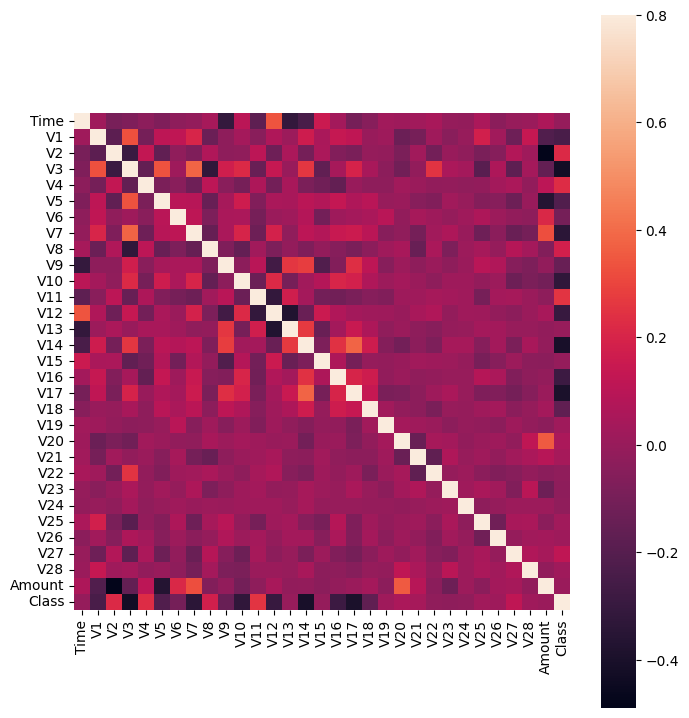

In [9]:
#Plotting the Correlation Matrix
# Correlation matrix
corrmat = creditCard_data.corr()
fig = plt.figure(figsize = (8, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
#Separating the X and the Y values
# dividing the X and the Y from the dataset
X = creditCard_data.drop(['Class'], axis = 1)
Y = creditCard_data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(29798, 30)
(29798,)


In [11]:
#Training and Testing Data Bifurcation
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [12]:
#Building a Random Forest Model using scikit learn
#Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [13]:
#Building all kinds of evaluating parameters
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9998322147651006
The precision is 1.0
The recall is 0.9411764705882353
The F1-Score is 0.9696969696969697
The Matthews correlation coefficient is0.9700608898402332


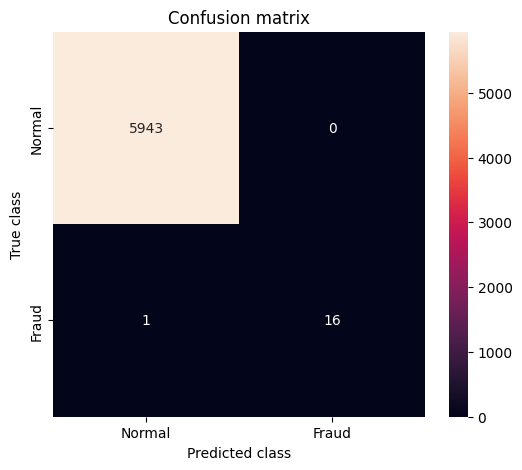

In [14]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(6,5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()